In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math

from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [748]:
df = pd.read_csv('/content/drive/MyDrive/DMG/A3/csv_result-apascal_entire_trainvsall.csv')
# del df['id']
df.drop(['id'], axis=1, inplace=True)
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att56,att57,att58,att59,att60,att61,att62,att63,att64,class
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# EDA

In [749]:
df.shape

(12695, 65)

In [750]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att56,att57,att58,att59,att60,att61,att62,att63,att64,class
count,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,...,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000
mean,0.062938,0.152265,0.011501,0.069791,0.042694,0.511304,0.080425,0.033084,0.481686,0.316345,...,0.398503,0.100276,0.073572,0.039701,0.017724,0.014967,0.145805,0.032060,0.002363,0.013864
std,0.242861,0.359291,0.106627,0.254805,0.202174,0.499892,0.271961,0.178863,0.499684,0.465068,...,0.489609,0.300379,0.261084,0.195263,0.131950,0.121424,0.352925,0.176166,0.048557,0.116930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


att47  att63    0.948260
att12  att13    0.941159
att15  att12    0.930793
att63  att50    0.924224
att47  att50    0.923972
                  ...   
att9   att62   -0.398285
att2   att9    -0.408559
att17  att53   -0.437932
att53  att9    -0.504460
att1   att1          NaN
Length: 2017, dtype: float64

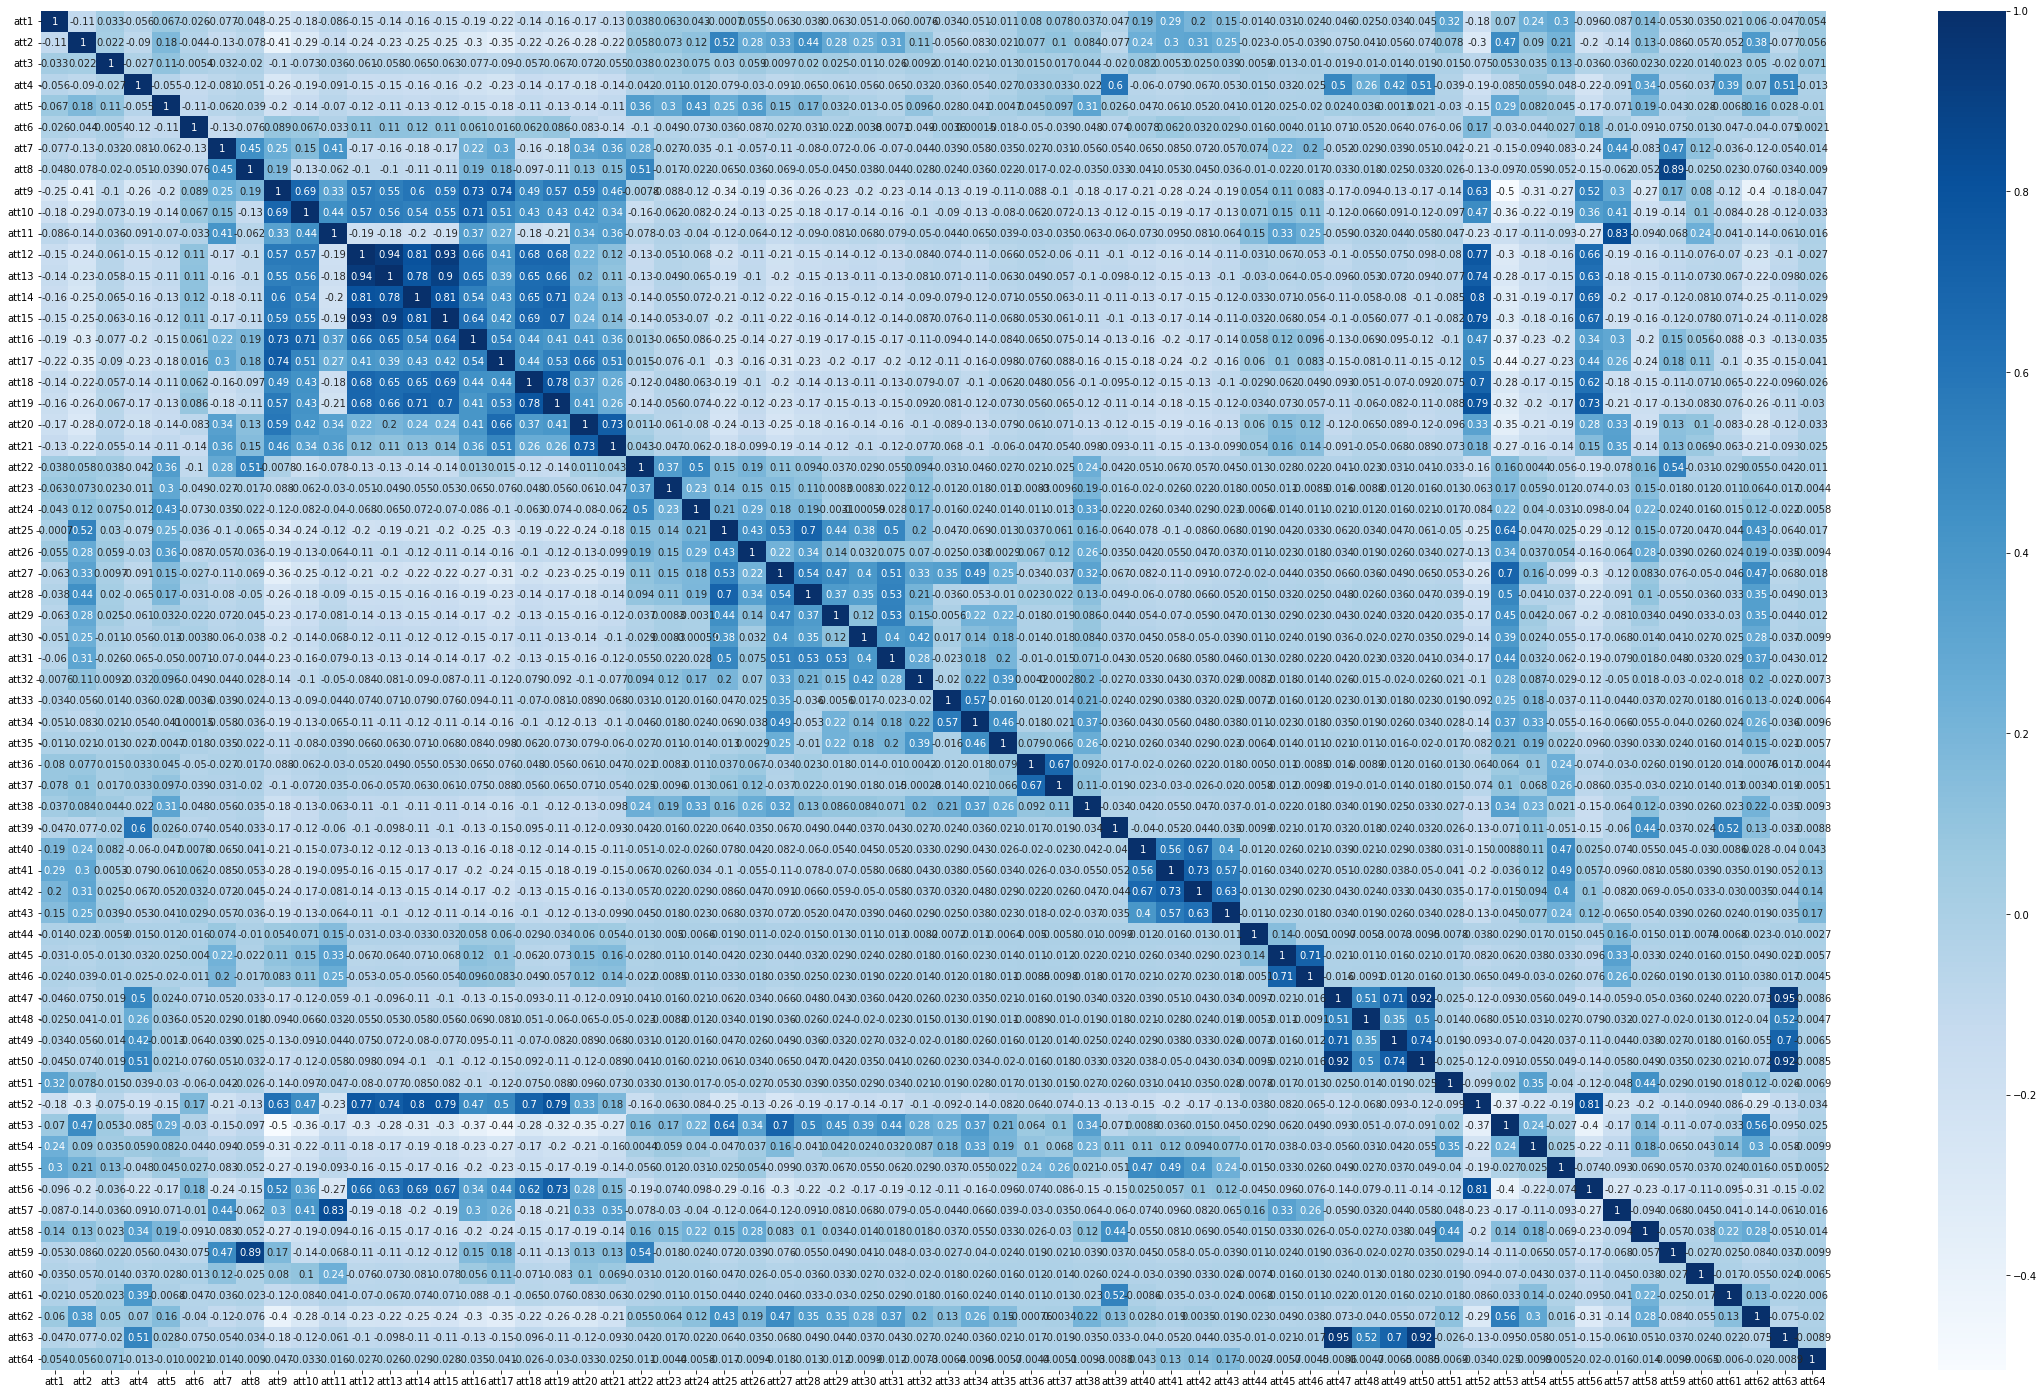

In [751]:
df_corr = df.drop(['class'], axis=1).corr()

plt.figure(figsize=(40, 25))
sns.heatmap(df_corr, cmap="Blues",annot=True)
df_corr[df_corr < 1].unstack().transpose()\
    .sort_values( ascending = False)\
    .drop_duplicates()

In [752]:
df_corr

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att55,att56,att57,att58,att59,att60,att61,att62,att63,att64
att1,1.000000,-0.107127,0.032889,-0.055711,0.067205,-0.026300,-0.076644,-0.047939,-0.249838,-0.176293,...,0.298563,-0.095669,-0.086520,0.135690,-0.052695,-0.034812,-0.021260,0.060202,-0.047166,0.054190
att2,-0.107127,1.000000,0.022145,-0.090271,0.176201,-0.043576,-0.125335,-0.078394,-0.408559,-0.288291,...,0.213744,-0.200314,-0.141486,0.125789,-0.086172,-0.056928,-0.052240,0.379687,-0.077130,0.056137
att3,0.032889,0.022145,1.000000,-0.026645,0.108778,-0.005395,-0.031899,-0.019952,-0.103982,-0.073373,...,0.132573,-0.036490,-0.036009,0.023370,-0.021931,-0.014489,0.023212,0.049640,-0.019630,0.070828
att4,-0.055711,-0.090271,-0.026645,1.000000,-0.054787,-0.117518,-0.081005,-0.050667,-0.264056,-0.186326,...,-0.047768,-0.222951,-0.091444,0.338453,-0.055694,-0.036793,0.391450,0.069920,0.508233,-0.013331
att5,0.067205,0.176201,0.108778,-0.054787,1.000000,-0.107666,-0.062454,-0.039064,-0.203584,-0.143655,...,0.044927,-0.171893,-0.070502,0.189724,-0.042939,-0.028367,-0.006777,0.156747,0.027921,-0.010278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
att60,-0.034812,-0.056928,-0.014489,-0.036793,-0.028367,-0.013189,0.116139,-0.024847,0.079599,0.101187,...,-0.037481,-0.109335,-0.044844,-0.037854,-0.027312,1.000000,-0.016557,-0.055497,-0.024446,-0.006538
att61,-0.021260,-0.052240,0.023212,0.391450,-0.006777,-0.046914,-0.036453,-0.022801,-0.118828,-0.083849,...,-0.024370,-0.095030,-0.041151,0.218729,-0.025063,-0.016557,1.000000,0.131065,-0.022433,-0.005999
att62,0.060202,0.379687,0.049640,0.069920,0.156747,-0.040376,-0.122183,-0.076423,-0.398285,-0.281042,...,0.015775,-0.307108,-0.137928,0.275992,-0.084005,-0.055497,0.131065,1.000000,-0.075191,-0.020108
att63,-0.047166,-0.077130,-0.019630,0.508233,0.027921,-0.075232,-0.053822,-0.033664,-0.175445,-0.123799,...,-0.050781,-0.148134,-0.060757,-0.051287,-0.037004,-0.024446,-0.022433,-0.075191,1.000000,-0.008858


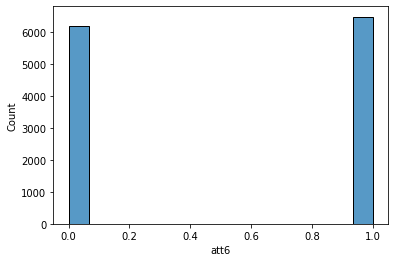

In [753]:
sns.histplot(x = 'att6', data = df)
plt.show()

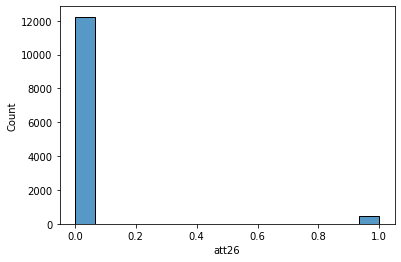

In [754]:
sns.histplot(x = 'att26', data = df)
plt.show()

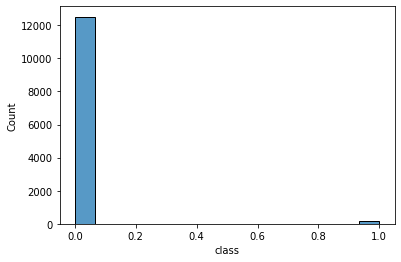

In [755]:
sns.histplot(x = 'class', data = df)
plt.show()

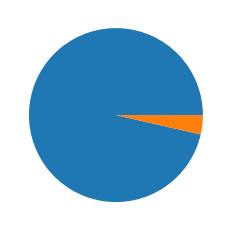

In [756]:
y = np.array([df['att26'].value_counts()[0], df['att26'].value_counts()[1]])
plt.pie(y)
plt.show() 

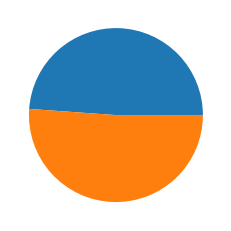

In [757]:
y = np.array([df['att6'].value_counts()[0], df['att6'].value_counts()[1]])
plt.pie(y)
plt.show() 

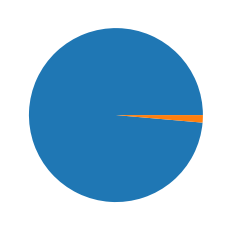

In [758]:
y = np.array([df['class'].value_counts()[0], df['class'].value_counts()[1]])
plt.pie(y)
plt.show() 

# Analyzing Correlation: Manual Dimentionality Reduction

In [759]:
mean_corr = df_corr[df_corr >= 0].mean(skipna=True).mean(skipna=True)
mean_corr 

0.3440544924621852

In [760]:
features = ['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17', 'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25', 'att26', 'att27', 'att28', 'att29', 'att30', 'att31', 'att32', 'att33', 'att34', 'att35', 'att36', 'att37', 'att38', 'att39', 'att40', 'att41', 'att42', 'att43', 'att44', 'att45', 'att46', 'att47', 'att48', 'att49', 'att50', 'att51', 'att52', 'att53', 'att54', 'att55', 'att56', 'att57', 'att58', 'att59', 'att60', 'att61', 'att62', 'att63', 'att64']
dropped_features = []
while True:
    found = False
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if df_corr[features[i]][features[j]] > mean_corr:
                dropped_features.append(features[i])
                features.pop(i)
                found = True
                break
        if found == True:
            break
            
    if found == False:
        break

features = sorted(features, key = lambda x: int(x[3:])) # final list of features after dimentionality reduction
print(features) # reduction to 23 features

['att1', 'att3', 'att6', 'att23', 'att24', 'att26', 'att35', 'att37', 'att38', 'att43', 'att44', 'att46', 'att54', 'att55', 'att56', 'att57', 'att58', 'att59', 'att60', 'att61', 'att62', 'att63', 'att64']


In [761]:
min_corr, max_corr = 0, 0
pos_rel_features, neg_rel_features = [], []


for f in features:
    try:
        val = df.corr()['class'][f]
        if max_corr < val:
            max_corr = val
            pos_rel_features = [('class', f)]
        elif max_corr == val:
            pos_rel_features.append(('class', f))
            
        if min_corr > val:
            min_corr = val
            neg_rel_features = [('class', f)]
        elif min_corr == val:
            neg_rel_features.append(('class', f))
    except:
        continue


print(f"Max. Positively Related Features: {pos_rel_features}\tCorr. Value = {max_corr}")
print(f"Max. Negatively Related Features: {neg_rel_features} \tCorr. Value = {min_corr}")

Max. Positively Related Features: [('class', 'att26')]	Corr. Value = 0.28156033436022926
Max. Negatively Related Features: [('class', 'att6')] 	Corr. Value = -0.12128062439299052


# Training

#### Using Logistic

In [762]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [763]:
X = df.iloc[:,0:63]
Y = df['class']

In [764]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [765]:
y_train = np.ravel(y_train)

In [766]:
clf = LogisticRegression()

In [767]:
y_train = y_train.astype('int')

In [768]:
clf.fit(X_train,y_train)

LogisticRegression()

In [769]:
y_test = y_test.astype('int')
y_pred = clf.predict(X_test)

In [770]:
accuracy_score(y_pred , y_test)

0.9949880668257757

# Dimensionality Reduction (using PCA)

In [771]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
# scaler.fit(df)
scaler.fit(df.drop(['class'], axis=1, inplace=False))

StandardScaler()

In [772]:
# scaled_data = scaler.transform(df)
scaled_data = scaler.transform(df.drop(['class'], axis=1, inplace=False))

In [773]:
pca = PCA(n_components=23)
pca.fit(scaled_data)

PCA(n_components=23)

In [774]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(12695, 64)

In [775]:
x_pca.shape

(12695, 23)

Text(0, 0.5, 'Second Principal Component')

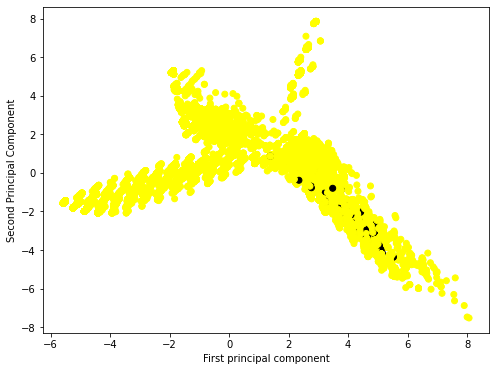

In [776]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['class'], cmap='gnuplot_r')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [777]:
pca.components_[0]

array([ 0.06642649,  0.15119874,  0.03092466,  0.06712738,  0.08338303,
       -0.03704384, -0.02486972, -0.00616766, -0.26335486, -0.21878461,
       -0.03833257, -0.24075252, -0.2331147 , -0.23685849, -0.24265532,
       -0.22739112, -0.22446   , -0.21680033, -0.23366666, -0.17656512,
       -0.13385533,  0.05047528,  0.04381795,  0.05984177,  0.14880992,
        0.08751542,  0.15621472,  0.12367361,  0.10464853,  0.08853939,
        0.10815218,  0.07324144,  0.04529527,  0.07567863,  0.0527856 ,
        0.03003295,  0.03496189,  0.08609347,  0.04398769,  0.05594607,
        0.06619158,  0.05945696,  0.04552788, -0.00721508, -0.01624704,
       -0.01330236,  0.04285863,  0.02507831,  0.03383472,  0.04250371,
        0.03918922, -0.24868499,  0.19700171,  0.10253435,  0.06970544,
       -0.22177284, -0.03446742,  0.0934877 , -0.00353855, -0.0071284 ,
        0.03193306,  0.15889613,  0.04368583,  0.01176629])

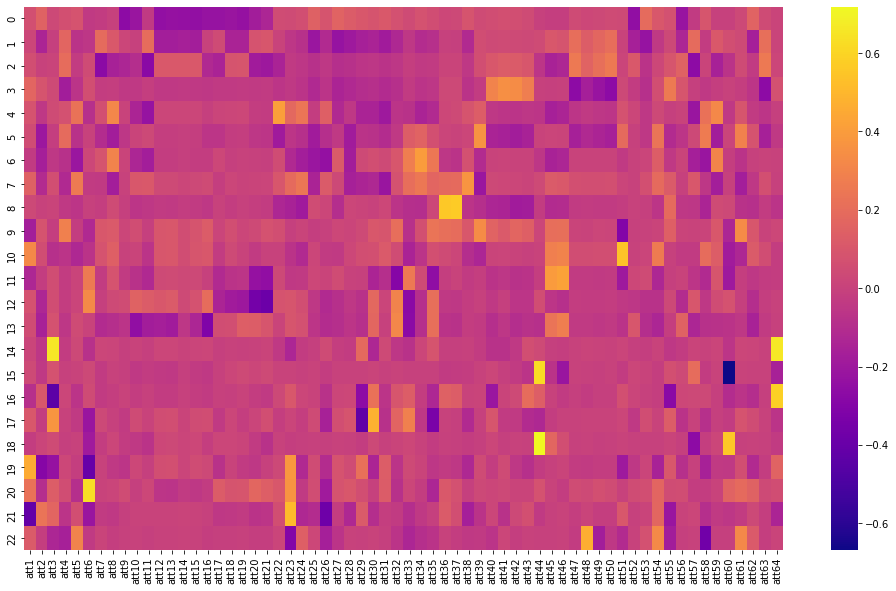

In [778]:
df_comp = pd.DataFrame(pca.components_, columns=['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17', 'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25', 'att26', 'att27', 'att28', 'att29', 'att30', 'att31', 'att32', 'att33', 'att34', 'att35', 'att36', 'att37', 'att38', 'att39', 'att40', 'att41', 'att42', 'att43', 'att44', 'att45', 'att46', 'att47', 'att48', 'att49', 'att50', 'att51', 'att52', 'att53', 'att54', 'att55', 'att56', 'att57', 'att58', 'att59', 'att60', 'att61', 'att62', 'att63', 'att64'])
plt.figure(figsize = (17,10))
sns.heatmap(df_comp, cmap='plasma',)

# New DataFrame after Dimension Reduction

In [779]:
df_new = df.drop(dropped_features, axis=1, inplace=False)
df_new

,att1,att3,att6,att23,att24,att26,att35,att37,att38,att43,...,att56,att57,att58,att59,att60,att61,att62,att63,att64,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12691,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12692,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12693,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Anomaly Detection

In [780]:
from collections import Counter
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [781]:
X = df_new.iloc[:,0:22]
Y = df_new['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [782]:
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)
one_class_svm

OneClassSVM(gamma='auto', nu=0.01)

In [783]:
prediction = one_class_svm.predict(X_test)

prediction = [1 if i==-1 else 0 for i in prediction]

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4142
           1       0.00      0.00      0.00        48

    accuracy                           0.98      4190
   macro avg       0.49      0.50      0.49      4190
weighted avg       0.98      0.98      0.98      4190



# Anomaly Detection- using LocalOutlierFactor

In [784]:
from sklearn.neighbors import LocalOutlierFactor
LoF = LocalOutlierFactor(n_neighbors=2)
outliers = LoF.fit_predict(df_new)

In [785]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [786]:
indexes = []
for i in range(len(outliers)):
    if(outliers[i] == -1):
        indexes.append(i)

In [787]:
df_new.drop(indexes , axis = 0, inplace = True)

In [788]:
df_new

,att1,att3,att6,att23,att24,att26,att35,att37,att38,att43,...,att56,att57,att58,att59,att60,att61,att62,att63,att64,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12691,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12692,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12693,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [789]:
df_new.reset_index(inplace = True)

# Re-Training Model

#### Using Logistic

In [790]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [791]:
X = df_new.iloc[:,0:63]
Y = df_new['class']

In [792]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [793]:
y_train = np.ravel(y_train)

In [794]:
clf = LogisticRegression()

In [795]:
y_train = y_train.astype('int')

In [796]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [797]:
y_test = y_test.astype('int')
y_pred = clf.predict(X_test)

In [798]:
accuracy_score(y_pred , y_test)

1.0

# Ignore Following
```
we Naives Bayes too
```

#### Using Naives-Bayes

In [740]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# from sklearn import matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [741]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [742]:
NBModel = GaussianNB()
NBModel.fit(X_train, Y_train)

GaussianNB()

In [743]:
Y_predicted = NBModel.predict(X_test)
Y_predicted

array([0, 0, 0, ..., 0, 0, 1])

In [744]:
accuracy_score(Y_test, Y_predicted) * 100

94.11919138881596

In [745]:
confusion_matrix(Y_test, Y_predicted)

array([[3528,  224],
       [   0,   57]])

In [746]:
classification_report(Y_test, Y_predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      0.94      0.97      3752\n           1       0.20      1.00      0.34        57\n\n    accuracy                           0.94      3809\n   macro avg       0.60      0.97      0.65      3809\nweighted avg       0.99      0.94      0.96      3809\n'